In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT_PATH = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT_PATH + "datasets/housing/housing.tgz"

In [3]:
def get_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
get_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housingDF = load_housing_data()
housingDF.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [7]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housingDF["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housingDF.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

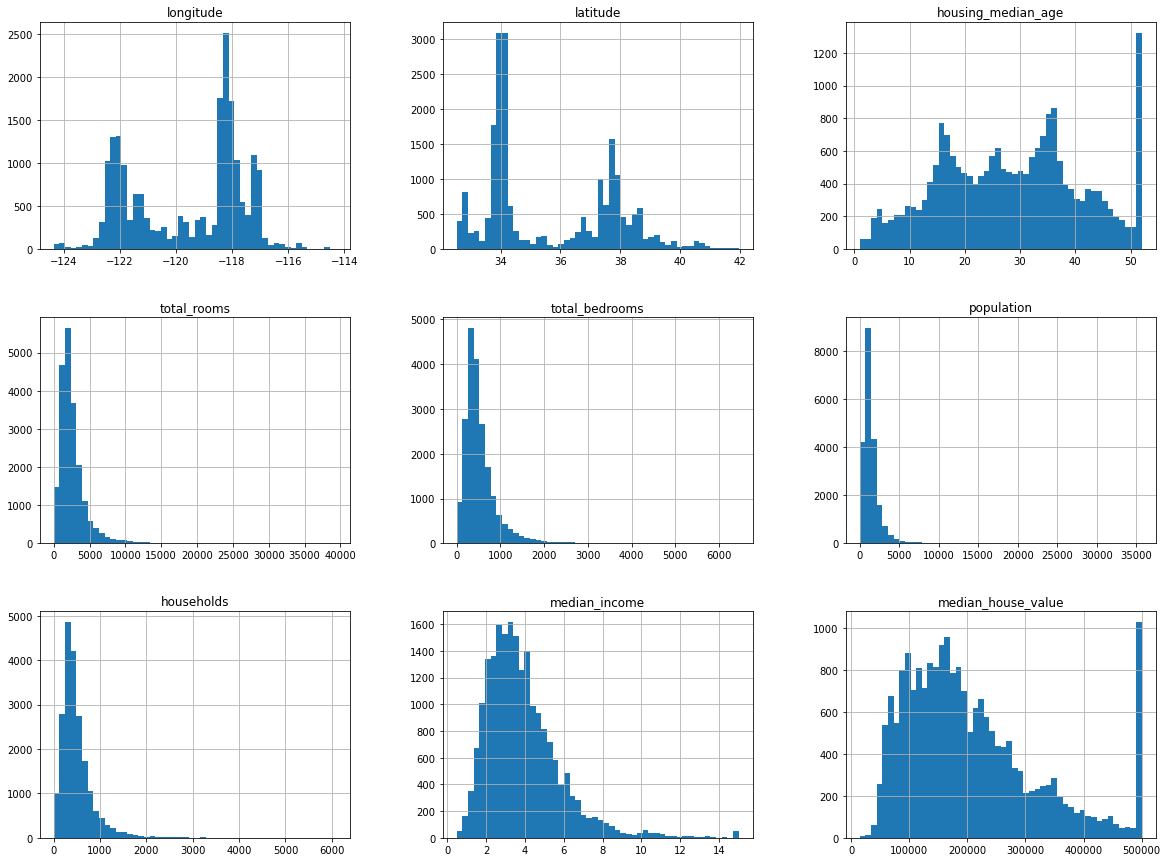

In [10]:
%matplotlib inline
import matplotlib.pyplot as matplt
housingDF.hist(bins=50, figsize=(20,15))
matplt.show()

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [12]:
train_set, test_set = split_train_test(housingDF, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housingDF_with_id = housingDF.reset_index() #adds an index column
train_set, test_set = split_train_test_by_id(housingDF_with_id, 0.2, "index")

housingDF_with_id["id"] = housingDF["longitude"] * 1000 + housingDF["latitude"]
train_set, test_set = split_train_test_by_id(housingDF_with_id, 0.2, "id")

In [14]:
from sklearn.model_selection import train_test_split

train_set, tests_set = train_test_split(housingDF, test_size=0.2, random_state=42)

In [15]:
housingDF["income_cat"] = np.ceil(housingDF["median_income"] / 1.5)
housingDF["income_cat"].where(housingDF["income_cat"] < 5, 5.0, inplace=True)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housingDF, housingDF["income_cat"]):
    stratified_train_set = housingDF.loc[train_index]
    stratified_test_set = housingDF.loc[test_index]

In [17]:
stratified_test_set["income_cat"].value_counts() / len(stratified_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [18]:
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [19]:
housingDF = stratified_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

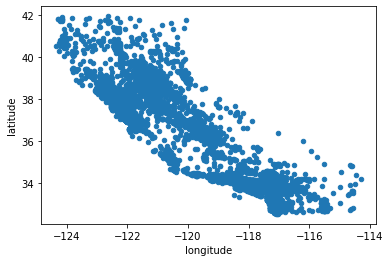

In [20]:
housingDF.plot(kind="scatter", x="longitude", y="latitude")

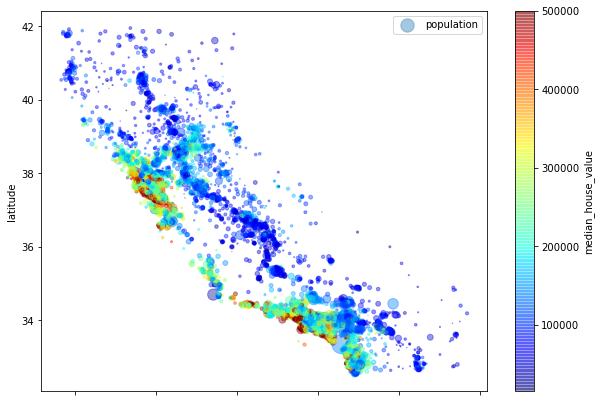

In [21]:
housingDF.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housingDF["population"]/100, label="population", 
             figsize=(10,7), c="median_house_value", cmap=matplt.get_cmap("jet"), colorbar=True)
matplt.legend()

In [22]:
corr_matrix = housingDF.corr()

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

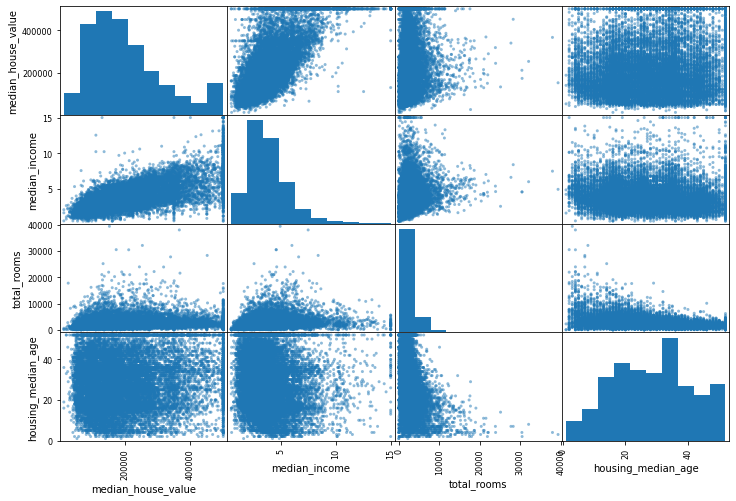

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housingDF[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

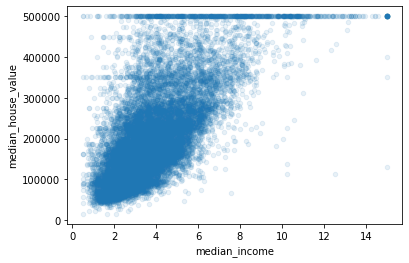

In [25]:
housingDF.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [26]:
housingDF["rooms_per_household"] = housingDF["total_rooms"]/housingDF["households"]
housingDF["bedrooms_per_room"] = housingDF["total_bedrooms"]/housingDF["total_rooms"]
housingDF["population_per_household"]=housingDF["population"]/housingDF["households"]

In [27]:
corr_matrix = housingDF.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [28]:
housingDF=stratified_train_set.drop("median_house_value", axis=1)
housingDF_labels = stratified_train_set["median_house_value"].copy()

In [29]:
housingDF.dropna(subset=["total_bedrooms"])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  
...           ...         ...            ...             ...  
6563        573.0       210.0         4.9312          INLAND  
12053      1052.0       258.0         2.0682          INLAND  
13908      2098.0       765.0         3.2723          INLAND  
11159      1356.0       356.0         4.0625       <1H OCEAN  
15775      1269.0       639.0         3.5750        NEAR BAY  

[16354 rows x 9 columns]

In [30]:
housingDF.drop("total_bedrooms", axis=1)

longitude  latitude  housing_median_age  total_rooms  population  \
17606    -121.89     37.29                38.0       1568.0       710.0   
18632    -121.93     37.05                14.0        679.0       306.0   
14650    -117.20     32.77                31.0       1952.0       936.0   
3230     -119.61     36.31                25.0       1847.0      1460.0   
3555     -118.59     34.23                17.0       6592.0      4459.0   
...          ...       ...                 ...          ...         ...   
6563     -118.13     34.20                46.0       1271.0       573.0   
12053    -117.56     33.88                40.0       1196.0      1052.0   
13908    -116.40     34.09                 9.0       4855.0      2098.0   
11159    -118.01     33.82                31.0       1960.0      1356.0   
15775    -122.45     37.77                52.0       3095.0      1269.0   

       households  median_income ocean_proximity  
17606       339.0         2.7042       <1H OCEAN  
18632       113.0         6.4214       <1H OCEAN  
14650       462.0         2.8621      NEAR OCEAN  
3230        353.0         1.8839          INLAND  
3555       1463.0         3.0347       <1H OCEAN  
...           ...            ...             ...  
6563        210.0         4.9312          INLAND  
12053       258.0         2.0682          INLAND  
13908       765.0         3.2723          INLAND  
11159       356.0         4.0625       <1H OCEAN  
15775       639.0         3.5750        NEAR BAY  

[16512 rows x 8 columns]

In [31]:
median = housingDF["total_bedrooms"].median()

In [32]:
housingDF["total_bedrooms"].fillna(median, inplace=True)

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [34]:
housing_number = housingDF.drop("ocean_proximity", axis=1)
imputer.fit(housing_number)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
housing_number.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
X = imputer.transform(housing_number)

In [37]:
housing_tr = pd.DataFrame(X,columns=housing_number.columns)

In [38]:
housing_catagory = housingDF["ocean_proximity"]
housing_catagory.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [39]:
housing_catagory_encoded, housing_categories = housing_catagory.factorize()
housing_catagory_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [40]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_catagory_1hot = encoder.fit_transform(housing_catagory_encoded.reshape(-1,1))
housing_catagory_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_catagory_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_category_reshaped = housing_catagory.values.reshape(-1,1)
housing_catagory_1hot = ordinal_encoder.fit_transform(housing_category_reshaped)
housing_catagory_1hot

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [44]:
#ordinal_encoder = OrdinalEncoder(encoding="onehot-dense")
#housing_category_1hot = ordinal_encoder.fit_transform(housing_category_reshaped)
#housing_category_1hot

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [46]:
class CombinedAttributesAdder(BaseEstimator,  TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housingDF.values)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler())
])

In [48]:
housing_number_tr = num_pipeline.fit_transform(housing_number)

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [50]:
number_attributes = list(housing_number)
category_attributes = ["ocean_proximity"]

number_pipeline = Pipeline([
    ('selector', DataFrameSelector(number_attributes)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [51]:
category_pipeline = Pipeline([
    ('selector', DataFrameSelector(category_attributes)),
    ('cat_encoder', OrdinalEncoder()),
])

In [52]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", number_pipeline),
    ("cat_pipeline", category_pipeline),
])

In [53]:
housingDF_prepared = full_pipeline.fit_transform(housingDF)
housingDF_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.08649871,
         0.15531753,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.03353391,
        -0.83628902,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.09240499,
         0.4222004 ,  4.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.03055414,
        -0.52177644,  1.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.06150916,
        -0.30340741,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.09586294,
         0.10180567,  3.        ]])

In [54]:
housingDF_prepared.shape

(16512, 12)

In [55]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(housingDF_prepared, housingDF_labels)

LinearRegression()

In [56]:
some_data = housingDF.iloc[:5]
some_labels = housingDF_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", linear_regression.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [206995.11061891 318951.22197374 205450.41727608  71346.26409049
 185872.83011256]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [57]:
from sklearn.metrics import mean_squared_error

housingDF_predictions = linear_regression.predict(housingDF_prepared)

linear_mse = mean_squared_error(housingDF_labels, housingDF_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_rmse

69422.32378905766

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(housingDF_prepared, housingDF_labels)

DecisionTreeRegressor()

In [59]:
housingDF_predictions = tree_regressor.predict(housingDF_prepared)

In [60]:
tree_mse = mean_squared_error(housingDF_labels, housingDF_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0